### Predicting The Future with Python
#### PYMNTOs, June 8, 2017

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [2]:
%matplotlib inline

In [3]:
# Read in the source data - downloaded from google analytics
df = pd.read_excel('https://github.com/chris1610/pbpython/blob/master/data/All-Web-Site-Data-Audience-Overview.xlsx?raw=True')

In [4]:
df.head()

,Day Index,Sessions
0,2014-09-25,1
1,2014-09-26,4
2,2014-09-27,8
3,2014-09-28,42
4,2014-09-29,233


In [5]:
# Convert to log format
df['Sessions'] = np.log(df['Sessions'])

In [6]:
# Need to name the columns like this in order for prophet to work
df.columns = ["ds", "y"]

In [7]:
# Create the model
m1 = Prophet()
m1.fit(df)

In [8]:
# Predict out a year
future1 = m1.make_future_dataframe(periods=365)
forecast1 = m1.predict(future1)

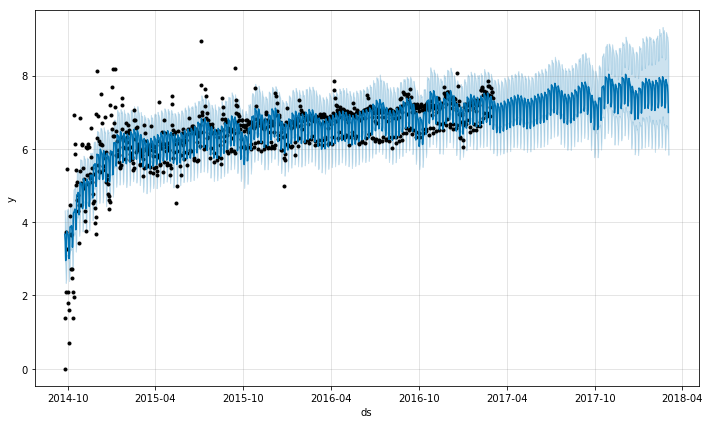

In [9]:
m1.plot(forecast1);

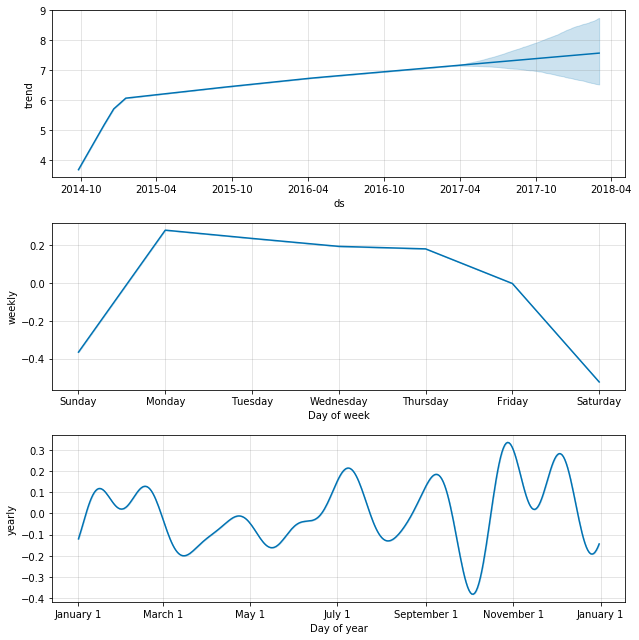

In [10]:
m1.plot_components(forecast1);

In [11]:
articles = pd.DataFrame({
  'holiday': 'publish',
  'ds': pd.to_datetime(['2014-09-27', '2014-10-05', '2014-10-14', '2014-10-26', '2014-11-9',
                        '2014-11-18', '2014-11-30', '2014-12-17', '2014-12-29', '2015-01-06',
                        '2015-01-20', '2015-02-02', '2015-02-16', '2015-03-23', '2015-04-08',
                        '2015-05-04', '2015-05-17', '2015-06-09', '2015-07-02', '2015-07-13',
                        '2015-08-17', '2015-09-14', '2015-10-26', '2015-12-07', '2015-12-30',
                        '2016-01-26', '2016-04-06', '2016-05-16', '2016-06-15', '2016-08-23',
                        '2016-08-29', '2016-09-06', '2016-11-21', '2016-12-19', '2017-01-17',
                        '2017-02-06', '2017-02-21', '2017-03-06']),
  'lower_window': 0,
  'upper_window': 5,
})
articles.head()

,ds,holiday,lower_window,upper_window
0,2014-09-27,publish,0,5
1,2014-10-05,publish,0,5
2,2014-10-14,publish,0,5
3,2014-10-26,publish,0,5
4,2014-11-09,publish,0,5


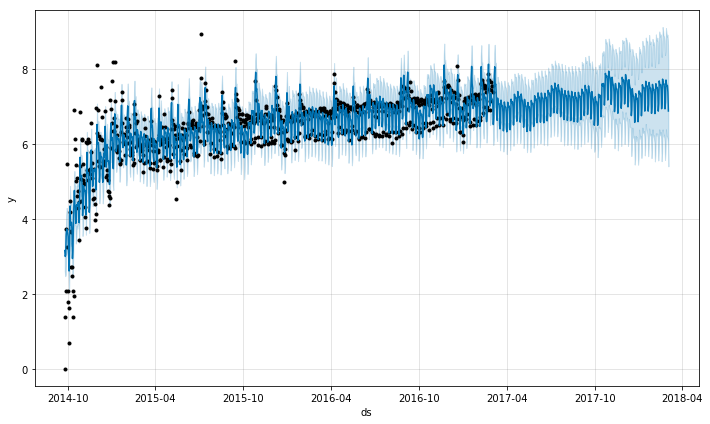

In [12]:
m2 = Prophet(holidays=articles).fit(df)
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)
m2.plot(forecast2);

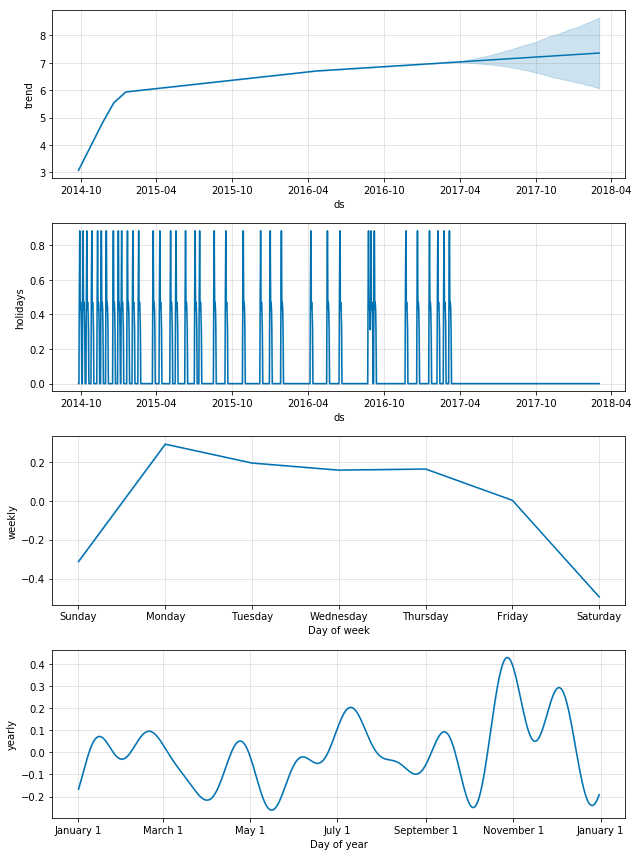

In [13]:
m2.plot_components(forecast2);

In [14]:
forecast2.head()

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,publish,publish_lower,publish_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
0,2014-09-25,0.000000,3.080198,0.072991,0.072991,3.080198,3.080198,2.608365,3.742410,0.000000,0.000000,0.000000,0.162671,0.162671,0.162671,-0.089680,-0.089680,-0.089680,0.072991,3.153189
1,2014-09-26,0.001124,3.110246,-0.114283,-0.114283,3.110246,3.110246,2.470895,3.550829,0.000000,0.000000,0.000000,0.002165,0.002165,0.002165,-0.116448,-0.116448,-0.116448,-0.114283,2.995963
2,2014-09-27,0.002247,3.140294,-0.103136,-0.103136,3.140294,3.140294,2.512293,3.563757,0.532607,0.532607,0.532607,-0.493243,-0.493243,-0.493243,-0.142501,-0.142501,-0.142501,-0.103136,3.037158
3,2014-09-28,0.003371,3.170343,0.404199,0.404199,3.170343,3.170343,3.034737,4.100938,0.883361,0.883361,0.883361,-0.312015,-0.312015,-0.312015,-0.167148,-0.167148,-0.167148,0.404199,3.574542
4,2014-09-29,0.004494,3.200391,0.528059,0.528059,3.200391,3.200391,3.185862,4.290530,0.427628,0.427628,0.427628,0.290137,0.290137,0.290137,-0.189706,-0.189706,-0.189706,0.528059,3.728450


In [15]:
forecast2["Sessions"] = np.exp(forecast2.yhat).round()

In [19]:
forecast2[["ds", "Sessions"]].tail()

,ds,Sessions
1251,2018-02-27,1998.0
1252,2018-02-28,1911.0
1253,2018-03-01,1905.0
1254,2018-03-02,1607.0
1255,2018-03-03,970.0
